<a href="https://colab.research.google.com/github/kristina-skoptsova/image_processing/blob/main/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
!git clone https://github.com/kristina-skoptsova/image_processing

Cloning into 'image_processing'...
remote: Enumerating objects: 2321, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 2321 (delta 23), reused 156 (delta 16), pack-reused 2152 (from 1)
Receiving objects: 100% (2321/2321), 125.24 MiB | 25.08 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (2888/2888), done.


In [3]:
%cd image_processing

/content/image_processing


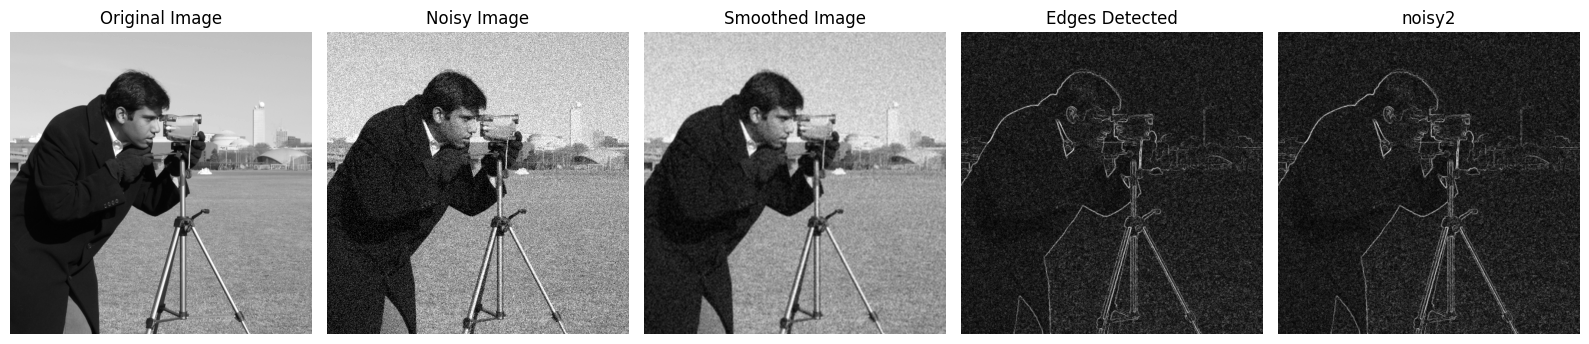

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, img_as_float
from skimage.util import random_noise

# Загрузка и подготовка изображения
image = img_as_float(data.camera())
noisy_image = random_noise(image, mode="gaussian", var=0.01)

# Применение сглаживающего фильтра
smoothed_image = filters.rank.mean(noisy_image, np.ones((3, 3)))

# Применение фильтра Собеля для выделения границ
edges = filters.sobel(noisy_image)

# Отображение результатов
fig, axes = plt.subplots(1, 5, figsize=(16, 4))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(noisy_image, cmap="gray")
axes[1].set_title("Noisy Image")
axes[1].axis("off")

axes[2].imshow(smoothed_image, cmap="gray")
axes[2].set_title("Smoothed Image")
axes[2].axis("off")

axes[3].imshow(edges, cmap="gray")
axes[3].set_title("Edges Detected")
axes[3].axis("off")

edges = filters.sobel(noisy_image)
axes[4].imshow(edges, cmap="gray")
axes[4].set_title("noisy2")
axes[4].axis("off")

plt.tight_layout()
plt.show()

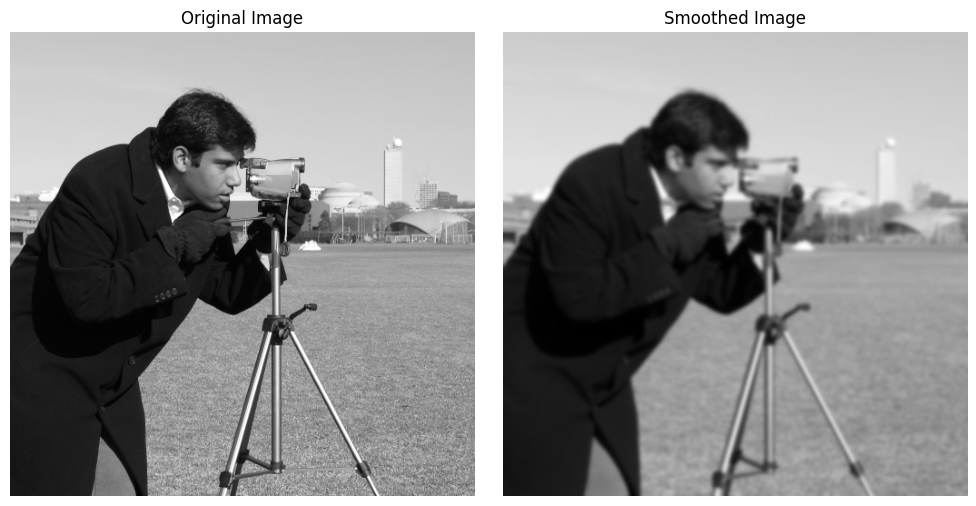

In [17]:
from skimage import data, img_as_float
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Загрузка изображения
image = img_as_float(data.camera())

# Применение гауссовской свёртки
sigma = 2  # Стандартное отклонение для Гауссова ядра
smoothed_image = gaussian_filter(image, sigma=sigma)

# Отображение результатов
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(smoothed_image, cmap="gray")
ax[1].set_title("Smoothed Image")
ax[1].axis("off")

plt.tight_layout()
plt.show()

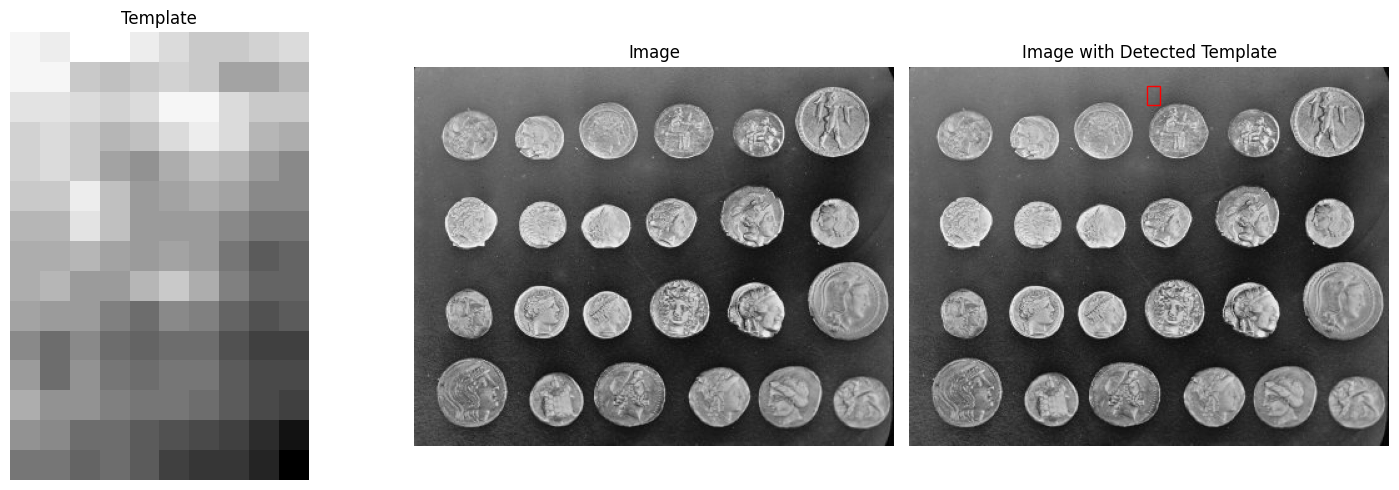

In [37]:
from skimage import data
from skimage.feature import match_template
import matplotlib.pyplot as plt

# Загрузка изображения и выбор шаблона
image = data.coins()
template = image[15:30, 190:200]  # Выбор части изображения как шаблон

# Поиск шаблона на изображении
result = match_template(image, template)

# Определение местоположения шаблона
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(template, cmap="gray")
ax[0].set_title("Template")
ax[0].axis("off")

ax[1].imshow(image, cmap="gray")
ax[1].set_title("Image")
ax[1].axis("off")

# Показать обнаруженный шаблон на изображении
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor="r", facecolor="none")
ax[2].add_patch(rect)
ax[2].imshow(image, cmap="gray")
ax[2].set_title("Image with Detected Template")
ax[2].axis("off")

plt.tight_layout()
plt.show()

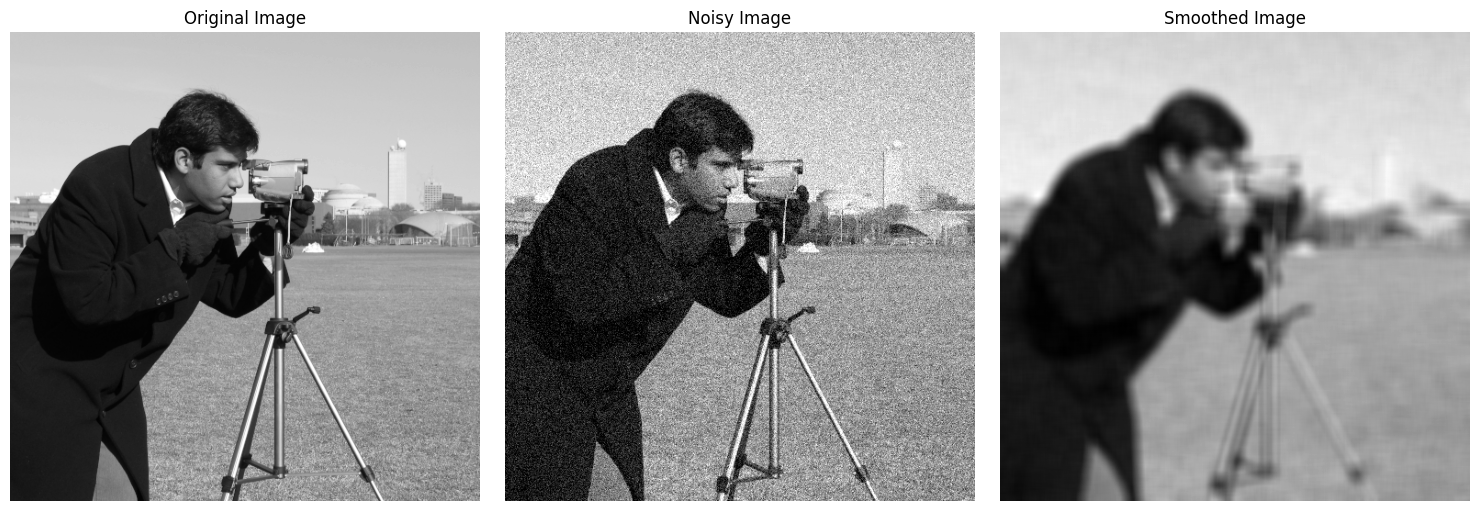

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import data, img_as_float
from skimage.util import random_noise

# Загрузка и подготовка изображения
image = img_as_float(data.camera())
noisy_image = random_noise(image, mode="gaussian", var=0.01)

# Определение ядра усредняющего фильтра
kernel_size = 15  # Размер 3x3
kernel = np.ones((kernel_size, kernel_size)) / kernel_size**2

# Применение свёртки с усредняющим фильтром
smoothed_image = convolve(noisy_image, kernel)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_image, cmap="gray")
ax[1].set_title("Noisy Image")
ax[1].axis("off")

ax[2].imshow(smoothed_image, cmap="gray")
ax[2].set_title("Smoothed Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()

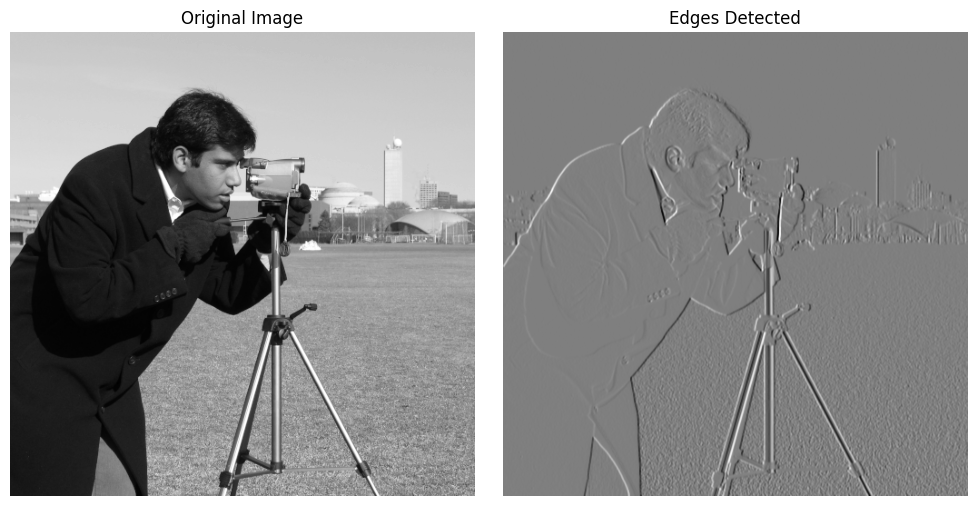

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import data, img_as_float

# Загрузка изображения
image = img_as_float(data.camera())

# Определение ядра свёртки для выделения границ
# Это пример простого горизонтального фильтра Собеля
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Применение свёртки
edges = convolve(image, kernel)

# Отображение результатов
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Edges Detected")
ax[1].axis("off")

plt.tight_layout()
plt.show()

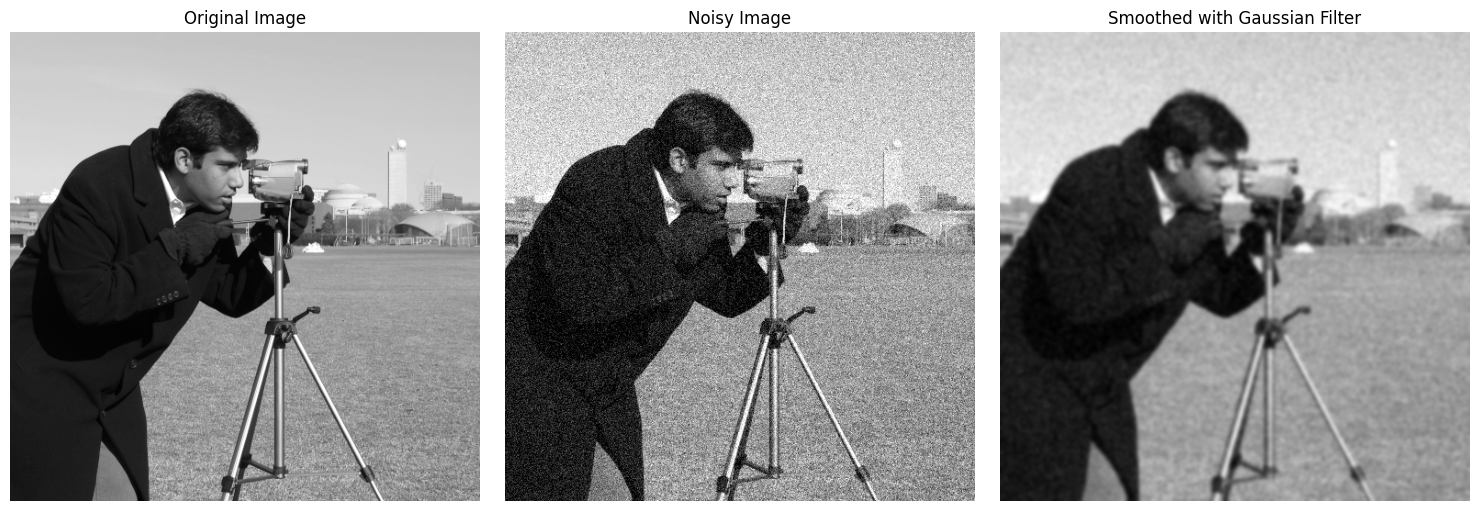

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import data, img_as_float
from skimage.util import random_noise

# Загрузка и подготовка изображения
image = img_as_float(data.camera())
# Добавление гауссовского шума к изображению
noisy_image = random_noise(image, mode="gaussian", var=0.01)

# Применение гауссовского фильтра для сглаживания
sigma = 2  # Параметр sigma контролирует степень размытия
smoothed_image = gaussian_filter(noisy_image, sigma=sigma)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_image, cmap="gray")
ax[1].set_title("Noisy Image")
ax[1].axis("off")

ax[2].imshow(smoothed_image, cmap="gray")
ax[2].set_title("Smoothed with Gaussian Filter")
ax[2].axis("off")

plt.tight_layout()
plt.show()

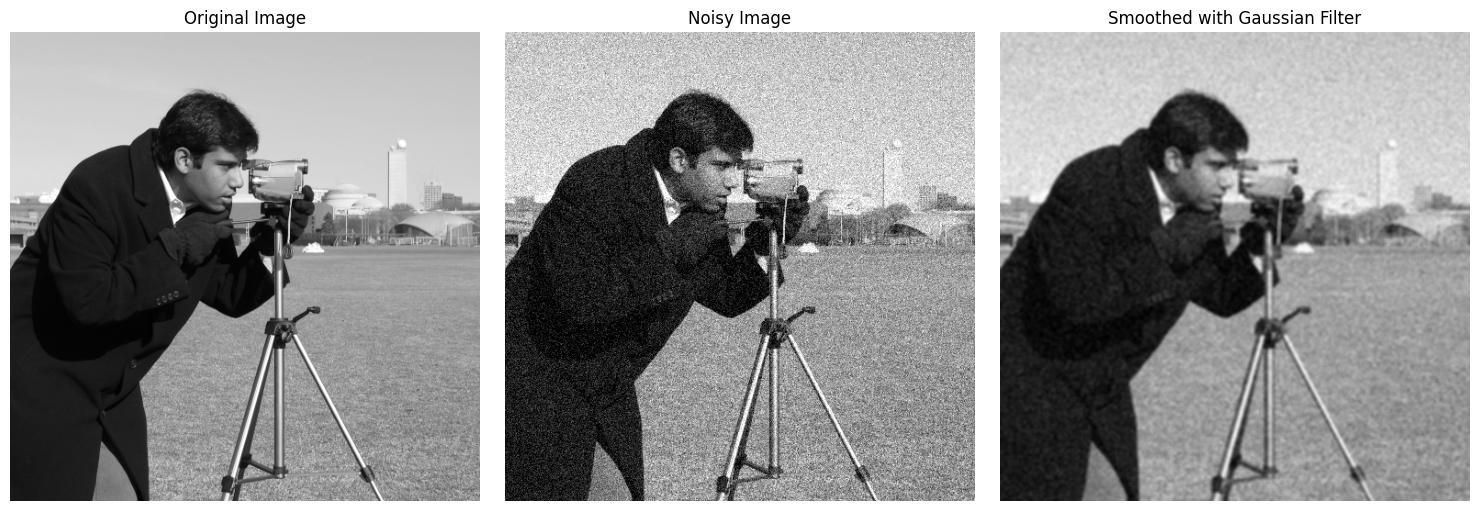

In [45]:
from scipy.ndimage import convolve
import numpy as np


# Функция для создания гауссовского ядра
def gaussian_kernel(size, sigma=1.0):
    size = int(size) // 2
    x, y = np.mgrid[-size : size + 1, -size : size + 1]
    g = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return g / g.sum()


# Создание гауссовского ядра
kernel = gaussian_kernel(5, sigma=2)

# Применение свёртки с гауссовским ядром к зашумлённому изображению
smoothed_image_explicit = convolve(noisy_image, kernel)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(noisy_image, cmap="gray")
ax[1].set_title("Noisy Image")
ax[1].axis("off")

ax[2].imshow(smoothed_image_explicit, cmap="gray")
ax[2].set_title("Smoothed with Gaussian Filter")
ax[2].axis("off")

plt.tight_layout()
plt.show()

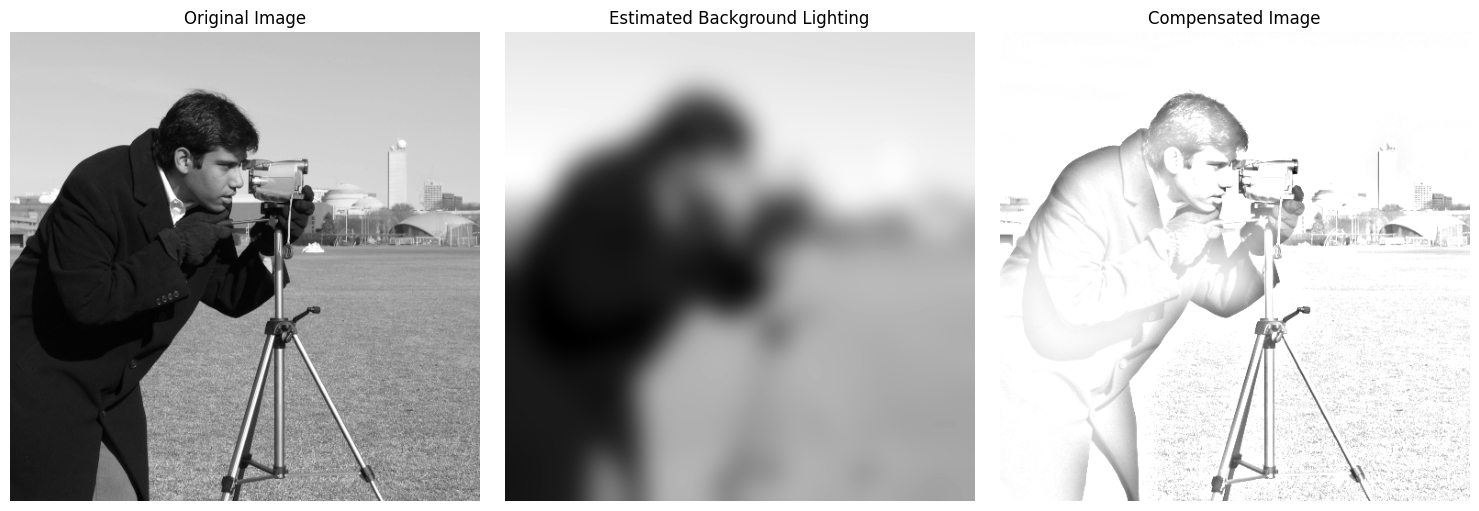

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy.ndimage import gaussian_filter

# Загрузка изображения
image = img_as_float(data.camera())

# Применение гауссовского размытия для имитации "фона" освещения
sigma = 15  # Большое значение sigma для получения широкого размытия
background = gaussian_filter(image, sigma=sigma)

# Компенсация разности освещения
compensated_image = image - background + 1  # +1 для сохранения положительного диапазона

# Клиппинг значений для ограничения их в пределах [0, 1]
compensated_image = np.clip(compensated_image, 0, 1)

# Отображение результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(background, cmap="gray")
ax[1].set_title("Estimated Background Lighting")
ax[1].axis("off")

ax[2].imshow(compensated_image, cmap="gray")
ax[2].set_title("Compensated Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()